In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [33]:
input_cols = [
#     'ANGER', 'CONTEMPT', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRAL', 'SADNESS', 'SURPRISE', 
    'picture_valance', 'picture_arousal', 'sound_valance', 'sound_arousal', 
    'ans_time', 'emotion_ans', 'valence_ans', 'arousal_ans'
]
output_cols = [
    'extraversion',"openness","conscientiousness","agreeableness","neurocism" 
]

dataset = pd.read_csv("preprocessed/ALL-DATA.csv")

data = dataset[input_cols]

data.describe()

,picture_valance,picture_arousal,sound_valance,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans
count,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000
mean,4.564202,6.022095,4.903490,6.373551,15.387507,0.882771,-0.556909,-0.466617
std,2.176713,0.810646,1.935859,0.887747,33.092150,2.064121,0.576375,0.627781
min,1.310000,3.770000,1.630000,3.930000,0.000186,-1.000000,-1.000000,-1.000000
25%,2.470000,5.670000,3.050000,5.890000,0.766920,-1.000000,-1.000000,-1.000000
50%,4.480000,6.210000,5.150000,6.480000,2.235797,1.000000,-1.000000,-1.000000
75%,6.730000,6.580000,6.770000,6.980000,5.305965,3.000000,-0.033442,0.025472
max,7.770000,7.350000,7.900000,7.990000,100.000000,5.000000,1.000000,1.000000


In [25]:
scaler_x = preprocessing.MinMaxScaler()
xscale = scaler_x.fit_transform(data)

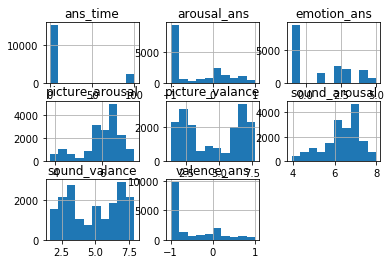

In [26]:
data.hist()
plt.savefig("histogram.png")

In [34]:
from sklearn.preprocessing import minmax_scale

all_columns = input_cols.copy()
all_columns.extend(output_cols)

print(input_cols)

dataset_2 = dataset[all_columns]


scaler = preprocessing.MinMaxScaler()

normalized = scaler.fit_transform(dataset_2[dataset_2.columns].values)

data_scaled = pd.DataFrame(normalized, columns=all_columns)

# dataset_2_scaled = scaler_x.fit_transform(dataset_2)
dataset_2.head(20)

['picture_valance', 'picture_arousal', 'sound_valance', 'sound_arousal', 'ans_time', 'emotion_ans', 'valence_ans', 'arousal_ans']


,picture_valance,picture_arousal,sound_valance,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans,extraversion,openness,conscientiousness,agreeableness,neurocism
0,4.31,4.47,4.96,5.37,1.184649,1.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
1,2.91,5.86,3.37,6.39,1.718510,2.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
2,7.38,6.28,3.37,6.39,1.785309,-1.0,0.483333,0.163721,5.0,3.0,6.0,5.0,2.0
3,1.82,5.75,6.40,5.64,2.653014,-1.0,-0.995714,0.180954,5.0,3.0,6.0,5.0,2.0
4,2.91,5.86,7.64,6.03,0.033457,4.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
5,7.56,5.74,7.64,6.03,0.217014,4.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
6,4.59,4.42,5.20,5.41,0.317123,4.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
7,4.05,4.38,4.64,4.93,0.167422,1.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0
8,5.24,3.97,5.64,4.77,0.600789,-1.0,-0.033442,-0.190947,5.0,3.0,6.0,5.0,2.0
9,7.40,6.58,3.55,6.98,0.934360,4.0,-1.000000,-1.000000,5.0,3.0,6.0,5.0,2.0


In [35]:
data_scaled.head(20)

,picture_valance,picture_arousal,sound_valance,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans,extraversion,openness,conscientiousness,agreeableness,neurocism
0,0.464396,0.195531,0.531100,0.354680,0.011845,0.333333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
1,0.247678,0.583799,0.277512,0.605911,0.017183,0.500000,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
2,0.939628,0.701117,0.277512,0.605911,0.017851,0.000000,0.741666,0.581861,0.444444,0.222222,0.555556,0.444444,0.111111
3,0.078947,0.553073,0.760766,0.421182,0.026528,0.000000,0.002143,0.590477,0.444444,0.222222,0.555556,0.444444,0.111111
4,0.247678,0.583799,0.958533,0.517241,0.000333,0.833333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
5,0.967492,0.550279,0.958533,0.517241,0.002168,0.833333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
6,0.507740,0.181564,0.569378,0.364532,0.003169,0.833333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
7,0.424149,0.170391,0.480064,0.246305,0.001672,0.333333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111
8,0.608359,0.055866,0.639553,0.206897,0.006006,0.000000,0.483279,0.404526,0.444444,0.222222,0.555556,0.444444,0.111111
9,0.942724,0.784916,0.306220,0.751232,0.009342,0.833333,0.000000,0.000000,0.444444,0.222222,0.555556,0.444444,0.111111


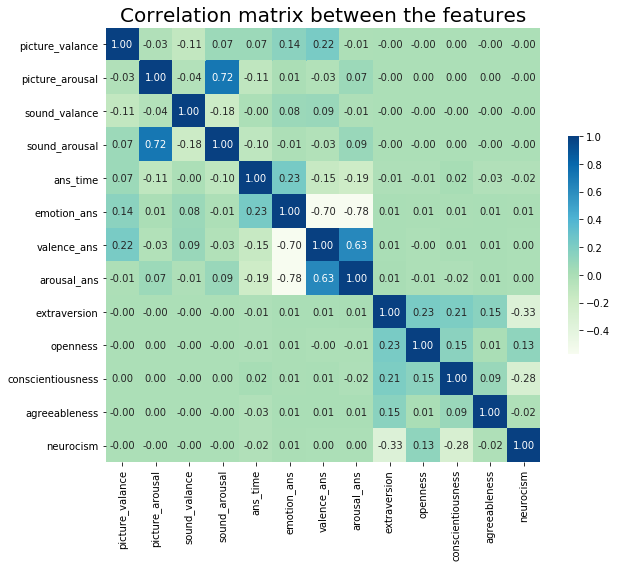

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_scaled.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()
plt.savefig("correlation.png")

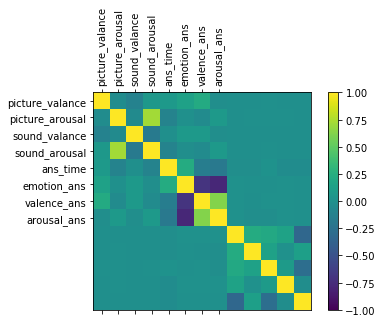

<Figure size 432x288 with 0 Axes>

In [39]:
correlations = dataset_2.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_2.columns)
ax.set_yticklabels(dataset_2.columns)
plt.xticks(rotation=90)
plt.show()
plt.savefig("correlation.png")